In [25]:
#Importing libraries
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer as regexp
from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns


In [26]:
#Importing the csv files

inspections_data = pd.read_csv('inspections_fact.csv')

In [27]:
inspections_data.head(3)

,inspection_id,License Number,Inspection Date,Inspection_Type,Results,Point_id
0,1983114,1273946,14.02.17,Canvass,Fail,1
1,1982908,2309123,09.02.17,Complaint,Fail,1
2,1982488,2500820,01.02.17,License,Fail,1


In [28]:
# Converting column 'Inspector_Comments' into str and lower-casing.

inspections_data['Results'] = inspections_data['Results'].str.lower()
inspections_data["Results"] = inspections_data["Results"].apply(str)
inspections_data.head(3)

,inspection_id,License Number,Inspection Date,Inspection_Type,Results,Point_id
0,1983114,1273946,14.02.17,Canvass,fail,1
1,1982908,2309123,09.02.17,Complaint,fail,1
2,1982488,2500820,01.02.17,License,fail,1


In [29]:
#Tokenization

regexp = RegexpTokenizer('\w+')
inspections_data['text_token'] = inspections_data['Results'].apply(regexp.tokenize)


In [ ]:
#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically 
# attuned to sentiments expressed in comments,social media,etc.
# It is used for sentiment analysis of text which has both the polarities i.e. positive/negative/neutral. 

In [31]:
#Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:

analyzer = SentimentIntensityAnalyzer()

In [32]:
#Polarity Scores

inspections_data['polarity'] = inspections_data['text_token'].apply(lambda x: analyzer.polarity_scores(x))
inspections_data.head(3)

,inspection_id,License Number,Inspection Date,Inspection_Type,Results,Point_id,text_token,polarity
0,1983114,1273946,14.02.17,Canvass,fail,1,[fail],"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
1,1982908,2309123,09.02.17,Complaint,fail,1,[fail],"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
2,1982488,2500820,01.02.17,License,fail,1,[fail],"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."


In [33]:
# Change data structure

inspections_data_new = pd.concat(
    [inspections_data.drop(['License Number', 'Inspection_Type', 'Point_id', 'polarity'], axis=1), 
     inspections_data['polarity'].apply(pd.Series)], axis=1)
inspections_data_new.head(3)

,inspection_id,Inspection Date,Results,text_token,neg,neu,pos,compound
0,1983114,14.02.17,fail,[fail],1.0,0.0,0.0,-0.5423
1,1982908,09.02.17,fail,[fail],1.0,0.0,0.0,-0.5423
2,1982488,01.02.17,fail,[fail],1.0,0.0,0.0,-0.5423


In [34]:
# Create new variable with sentiment "neutral," "positive" and "negative"

inspections_data_new['sentiment'] = inspections_data_new['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
inspections_data_new

,inspection_id,Inspection Date,Results,text_token,neg,neu,pos,compound,sentiment
0,1983114,14.02.17,fail,[fail],1.0,0.0,0.0,-0.5423,negative
1,1982908,09.02.17,fail,[fail],1.0,0.0,0.0,-0.5423,negative
2,1982488,01.02.17,fail,[fail],1.0,0.0,0.0,-0.5423,negative
3,1981443,13.01.17,pass w/ conditions,"[pass, w, conditions]",0.0,1.0,0.0,0.0000,neutral
4,1976633,06.12.16,pass w/ conditions,"[pass, w, conditions]",0.0,1.0,0.0,0.0000,neutral
...,...,...,...,...,...,...,...,...,...
114566,1516042,16.01.15,pass,[pass],0.0,1.0,0.0,0.0000,neutral
114567,1418768,08.01.15,pass,[pass],0.0,1.0,0.0,0.0000,neutral
114568,1138854,27.02.13,pass w/ conditions,"[pass, w, conditions]",0.0,1.0,0.0,0.0000,neutral
114569,529368,01.11.11,pass w/ conditions,"[pass, w, conditions]",0.0,1.0,0.0,0.0000,neutral


In [35]:
# Tweet with highest positive sentiment

inspections_data_new.loc[inspections_data_new['compound'].idxmax()].values

array([1981443, '13.01.17', 'pass w/ conditions',
       list(['pass', 'w', 'conditions']), 0.0, 1.0, 0.0, 0.0, 'neutral'],
      dtype=object)

In [36]:
# Tweet with highest negative sentiment 

inspections_data_new.loc[inspections_data_new['compound'].idxmin()].values

array([1983114, '14.02.17', 'fail', list(['fail']), 1.0, 0.0, 0.0,
       -0.5423, 'negative'], dtype=object)

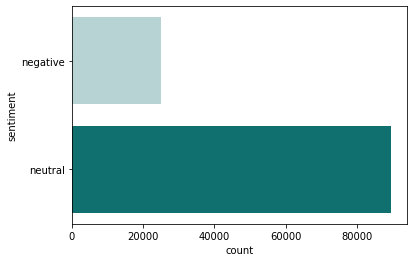

In [37]:
sns.countplot(y='sentiment', 
             data=inspections_data_new, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );
